# Introduction to BioPython


In [1]:
# Load Biopython library & Functions
import Bio
from Bio import SeqIO
from Bio.Seq import Seq, MutableSeq
from Bio.Seq import transcribe, back_transcribe, translate, complement, reverse_complement 

In [2]:
# Check Biopython version 
Bio.__version__

'1.76'

## Sequence Operations

In [3]:
# Sequence 
seq = Seq("GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC")

In [4]:
# Alphabet
seq.alphabet

Alphabet()

In [5]:
# Check type 
type(seq.alphabet)

Bio.Alphabet.Alphabet

In [6]:
# Find sub-sequence: if TRUE <- SubSeq Position, else <- return -1 
seq.find("ATC")

25

In [7]:
seq.find("ATGC")

-1

In [8]:
# Number of `A`
seq.count("A")

26

In [9]:
# Number of `C`
seq.count("C")

35

In [10]:
# Number of `T`
seq.count("T")

30

In [11]:
# Number of `G`
seq.count("G")

14

In [12]:
# K-mer analysis, K = 2(AA)<--dimer
seq.count("AA")

6

In [13]:
# K-mer analysis, K = 3(AAA)<--trimer
seq.count("AAA")

0

## Frequency

In [14]:
# Count frequency of nucleotides 
from collections import Counter
freq = Counter(seq)
print(freq)

Counter({'C': 35, 'T': 30, 'A': 26, 'G': 14})


## Reverse

In [15]:
# Reverse 
print(f'RefSeq: {seq}')
rev = str(seq[::-1])
print(f'RevSeq: {rev}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RevSeq: CTGAGGACGATCTACTTCCCTCTTCTAACAATCCAGGTGACTCTTCAATCCTACTATCCATATTAACCTCTCTCCACCTATTTCCCAAGTCGGACAAGGTCCAGG


## Complement

In [16]:
# Complement
print(f'RefSeq: {seq}')
com = seq.complement()
print(f'ComSeq: {com}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
ComSeq: CCTGGACCTTGTCCGACTTGGGAAATAGGTGGAGAGAGGTTAATATGGATAGTAGGATTGAAGAGTCACCTGGATTGTTAGAAGAGGGAAGTAGATCGTCCTCAG


## Reverse Complement

In [17]:
# Reverse complement 
print(f'RefSeq: {seq}')
rev_com = seq.reverse_complement()
print(f'RevCom: {rev_com}')

RefSeq: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RevCom: GACTCCTGCTAGATGAAGGGAGAAGATTGTTAGGTCCACTGAGAAGTTAGGATGATAGGTATAATTGGAGAGAGGTGGATAAAGGGTTCAGCCTGTTCCAGGTCC


## Transcription

In [18]:
# Transcription(DNA ==> RNA)
print(f'DNA: {seq}')
rna = seq.transcribe()
print(f'RNA: {rna}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
RNA: GGACCUGGAACAGGCUGAACCCUUUAUCCACCUCUCUCCAAUUAUACCUAUCAUCCUAACUUCUCAGUGGACCUAACAAUCUUCUCCCUUCAUCUAGCAGGAGUC


## Transcribe

In [19]:
# Back Transcription(RNA ==> DNA)
print(f'RNA: {rna}')
dna = rna.back_transcribe()
print(f'DNA: {dna}')

RNA: GGACCUGGAACAGGCUGAACCCUUUAUCCACCUCUCUCCAAUUAUACCUAUCAUCCUAACUUCUCAGUGGACCUAACAAUCUUCUCCCUUCAUCUAGCAGGAGUC
DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC


## Translation

In [20]:
# Translation(DNA ==> Protein)
print(f'DNA: {seq}')
prt = seq.translate()
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTG*TLYPPLSNYTYHPNFSVDLTIFSLHLAGV


In [21]:
# Let's varify the protein with length property
len(seq)

105

In [22]:
# Make codons 
len(seq) % 3 

0

In [23]:
# Number of codons 
len(seq) / 3 

35.0

In [24]:
# Now varify the protein length 
len(prt)

35

In [25]:
# Translation(DNA ==> Protein) Stop translation when found stop codon 
print(f'DNA: {seq}')
prt = seq.translate(to_stop=True)
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTG


In [26]:
# Translation(DNA ==> Protein) for Mitochondrial DNA 
print(f'DNA: {seq}')
prt = seq.translate(to_stop=True, table=2)
print(f'Protein: {prt}')

DNA: GGACCTGGAACAGGCTGAACCCTTTATCCACCTCTCTCCAATTATACCTATCATCCTAACTTCTCAGTGGACCTAACAATCTTCTCCCTTCATCTAGCAGGAGTC
Protein: GPGTGWTLYPPLSNYTYHPNFSVDLTIFSLHLAGV


## Handling Files

In [27]:
for seq_record in SeqIO.parse("../data/den1.fasta", "fasta"):
    ID = seq_record.id 
    seqs = seq_record.seq[:100]
    rep = repr(seq_record)
    length = len(seq_record)

In [28]:
# ID
print(ID)

NC_001477.1


In [29]:
# Sequence 
print(seqs)

AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTAACGTAGTTCTAACAGTTTTTTATTAGAGAGCAGATCTCTGATGAAC


In [30]:
# Representation
print(rep)

SeqRecord(seq=Seq('AGTTGTTAGTCTACGTGGACCGACAAGAACAGTTTCGAATCGGAAGCTTGCTTA...TCT', SingleLetterAlphabet()), id='NC_001477.1', name='NC_001477.1', description='NC_001477.1 Dengue virus 1, complete genome', dbxrefs=[])


In [31]:
# Length 
print(length)

10735


In [32]:
# Print the first nucleotide of each codon 
seqs[0::3]

Seq('ATTTATAGAAATGTGGTTATTTCTTAAGCATGGC', SingleLetterAlphabet())

In [33]:
# Print the first codon position
seqs[1::3]

Seq('GGACCGCAAAGTACACGTCATAATTTGAATCAA', SingleLetterAlphabet())

In [34]:
# Print the second codon position
seqs[2::3]

Seq('TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA', SingleLetterAlphabet())

In [35]:
# Sequence Length Comparison
seq1 = Seq("TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA")
seq2 = Seq("ATTTATAGAAATGTGGTTATTTCTTAAGCATGGC")
seq1 == seq2

False

In [36]:
# Mutable sequence 
mut_seq = MutableSeq("TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA")
print(f'MutSeq: {mut_seq}')
mut_seq[5] == "C"
print(mut_seq)
mut_seq.remove("T") 
print(mut_seq)
mut_seq.reverse()
print(mut_seq)

MutSeq: TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
TTGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
TGTGGCCGCTCAGATCAGGCAGTTTAGGCTTA
ATTCGGATTTGACGGACTAGACTCGCCGGTGT


In [37]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2020-09-20 14:00:57--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.227.141.133, 13.227.141.137, 13.227.141.126, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.227.141.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq.1’

SRR835775_1.first10 100%[===================>] 219.52K   304KB/s    in 0.7s    

2020-09-20 14:00:59 (304 KB/s) - ‘SRR835775_1.first1000.fastq.1’ saved [224786/224786]



In [38]:
# Working with Fastq files 
for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq"):
    print(record)
    
    print(record.seq)
    print(record.letter_annotations['phred_quality'])
    
    

ID: SRR835775.1
Name: SRR835775.1
Description: SRR835775.1 1/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAC', SingleLetterAlphabet())
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
[30, 30, 30, 33, 16, 32, 35, 35, 35, 23, 30, 30, 33, 33, 10, 34, 30, 33, 10, 25, 32, 32, 23, 23, 18, 34, 36, 36, 23, 30, 34, 18, 31, 35, 35, 35, 18, 8, 30, 35, 17, 26, 35, 34, 30, 23, 30, 28, 33, 32, 35, 28, 31, 34, 31, 7, 13, 21, 13, 21, 28, 32, 30, 28, 30, 31, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ID: SRR835775.2
Name: SRR835775.2
Description: SRR835775.2 2/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet())
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA

ID: SRR835775.74
Name: SRR835775.74
Description: SRR835775.74 74/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TAGGGTTAGGGTTTAGGGTTTAGGGTTTGGGGTTAGGGTTAGGGTTGGGGTTGG...GTT', SingleLetterAlphabet())
TAGGGTTAGGGTTTAGGGTTTAGGGTTTGGGGTTAGGGTTAGGGTTGGGGTTGGGGTTGGGGTTGGGGTTGGGGTTAGGGTTAGGGTTAGGGTTGGGGTT
[31, 31, 31, 35, 35, 32, 35, 35, 39, 39, 39, 32, 37, 39, 26, 37, 39, 40, 37, 34, 28, 18, 34, 38, 34, 27, 30, 26, 8, 30, 35, 31, 21, 30, 8, 30, 31, 33, 9, 7, 7, 24, 33, 24, 28, 26, 6, 20, 32, 27, 6, 12, 6, 24, 32, 24, 18, 18, 6, 23, 30, 33, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ID: SRR835775.75
Name: SRR835775.75
Description: SRR835775.75 75/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TTAGGGTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGG...AGG', SingleLetterAlphabet())
TTAGGGTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTTAGGGTTAGGGTTAGGGTTGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG


[26, 26, 30, 19, 32, 33, 35, 33, 35, 23, 34, 34, 27, 25, 34, 36, 36, 30, 36, 18, 34, 30, 36, 34, 32, 26, 26, 16, 25, 30, 34, 30, 26, 35, 35, 35, 24, 35, 30, 26, 30, 18, 35, 26, 30, 35, 35, 26, 23, 23, 33, 7, 8, 23, 31, 28, 34, 35, 36, 34, 31, 22, 30, 34, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
ID: SRR835775.171
Name: SRR835775.171
Description: SRR835775.171 171/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('AGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...TAG', SingleLetterAlphabet())
AGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTAGGGGTTAGGGGTAGGGTTAGGGTTAG
[31, 31, 31, 37, 32, 35, 35, 37, 39, 39, 37, 39, 39, 39, 41, 40, 34, 36, 39, 40, 40, 41, 40, 31, 37, 35, 38, 39, 40, 33, 37, 39, 39, 39, 40, 30, 35, 31, 37, 38, 40, 30, 37, 35, 39, 40, 37, 8, 28, 31, 37, 39, 40, 22, 31, 26, 34, 36, 39, 13, 28, 26, 30, 35, 37, 7, 26, 7, 26, 34, 32, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

Seq('ACAAACACCGTCTCCAGCGGGCAGAGCAAAGGAAGGGCACAGCGCCAGGCAGTG...GGC', SingleLetterAlphabet())
ACAAACACCGTCTCCAGCGGGCAGAGCAAAGGAAGGGCACAGCGCCAGGCAGTGGTGCAGCTGCCTGTCAGGAAGAGGCCTACTTCTGGTGAAACTGGGC
[34, 34, 34, 37, 37, 37, 37, 37, 38, 39, 39, 38, 39, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 40, 38, 40, 38, 39, 40, 40, 41, 41, 41, 41, 40, 41, 41, 41, 41, 37, 39, 39, 37, 37, 35, 35, 35, 35, 35, 34, 34, 35, 31, 31, 34, 35, 35, 35, 35, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 33, 35, 35, 35, 35, 34, 35, 35, 35, 34, 35, 35, 35, 35, 35, 35, 34, 35, 34, 34, 35, 35, 35, 34, 34, 35, 35]
ID: SRR835775.253
Name: SRR835775.253
Description: SRR835775.253 253/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('CCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACA...CCT', SingleLetterAlphabet())
CCATCAGGCACCAAAGGGATTCTGCCAGCATAGTGCTCCTGGACCAGTGATACACCCGGCACCCTGTCCTGGACATGCTGTTGGCCTGGATCTGAGCCCT
[34, 31, 31, 37, 37, 35, 37, 37, 38, 39, 39, 38, 38, 41, 40, 38, 41, 41, 40, 41

ID: SRR835775.322
Name: SRR835775.322
Description: SRR835775.322 322/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGT...GGG', SingleLetterAlphabet())
TGCAGGGATCCTGCTACAAAGGTGAAACCCAGGAGAGTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACGGG
[34, 34, 34, 37, 37, 37, 37, 35, 39, 39, 39, 39, 39, 41, 41, 41, 41, 40, 41, 41, 41, 40, 32, 38, 39, 40, 41, 41, 41, 41, 35, 39, 40, 35, 38, 37, 40, 30, 35, 37, 38, 38, 40, 40, 33, 38, 40, 41, 40, 38, 39, 33, 38, 38, 39, 40, 38, 38, 38, 40, 39, 39, 26, 35, 36, 36, 39, 37, 37, 37, 37, 31, 34, 35, 34, 33, 34, 34, 34, 35, 32, 31, 34, 25, 30, 33, 23, 32, 30, 32, 29, 32, 24, 16, 24, 30, 34, 33, 30, 31]
ID: SRR835775.323
Name: SRR835775.323
Description: SRR835775.323 323/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('CCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTTCCTTTGCT...GAT', SingleLetterAlphabet())
CCTCTTCCTGACAGGCAGCTGCACCACTGCCTGGCGCTGTGCCCTT

Seq('ATTGAGACTAGTGGGTGAATAGTCCAGGGCAGCTAACTTTAGTTATTATAGAAA...TGG', SingleLetterAlphabet())
ATTGAGACTAGTGGGTGAATAGTCCAGGGCAGCTAACTTTAGTTATTATAGAAAGGGCAGTAGCAGATGGGTCTGCTCCGTCTCGCTTCTAAGAAGGTGG
[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 37, 35, 35, 39, 41, 31, 36, 38, 39, 40, 40, 41, 41, 41, 40, 41, 41, 41, 41, 40, 40, 41, 40, 40, 41, 41, 40, 41, 41, 41, 40, 40, 40, 41, 41, 41, 41, 40, 34, 38, 38, 38, 40, 41, 41, 41, 41, 38, 40, 41, 39, 40, 40, 41, 40, 40, 40, 40, 39, 39, 39, 30, 34, 34, 36, 37, 37, 37, 37, 35, 30, 32, 33, 34, 34, 35, 35, 35, 33, 34, 34, 29, 34, 35, 35, 34, 33, 20, 25, 22]
ID: SRR835775.351
Name: SRR835775.351
Description: SRR835775.351 351/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('GTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGG...TGA', SingleLetterAlphabet())
GTGTGGAGTCCAGAGTGTTGCCAGGACCCAGGCACAGGCATTAGTGCCCGTTGGAGAAAACGGGAATCCCGAAGAAATGGTGGGTCCTGGCCATCCGTGA
[33, 33, 33, 37, 37, 37, 37, 37, 39, 38, 39, 39, 39, 41, 41, 38, 40, 41, 41, 33

CTGTCTGCCTGTGCTCCATGGGGGGACGGCTCCACCCAGCCTGCGCCACTGTGTTCTTCTCTGAAGAGGCTTCCAGAGAAAATGGCACACCAATCAATAA
[34, 34, 34, 35, 37, 37, 37, 37, 39, 39, 39, 39, 39, 41, 41, 41, 41, 41, 40, 40, 40, 41, 41, 41, 35, 27, 33, 33, 31, 35, 35, 35, 35, 35, 35, 33, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 32, 34, 34, 35, 35, 36, 34, 35, 35, 35, 35, 35, 34, 32, 34, 35, 35, 35, 35, 33, 35, 35, 34, 34, 34, 35, 33, 34, 35, 35, 35, 34, 35, 35, 33, 35, 35, 34, 31, 33, 30, 33, 35, 35, 35, 34, 34, 35, 34]
ID: SRR835775.458
Name: SRR835775.458
Description: SRR835775.458 458/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTC...CTC', SingleLetterAlphabet())
TTTTAGAGACCCCGTGTCTGTCACTGAAACCTTTTTTGTGGGAGACTATTCCTCCCATCTGCAACAGCTGCCCCTGCTGACGGCCCTTCTCTCCTCCCTC
[31, 31, 31, 37, 37, 37, 37, 37, 38, 39, 39, 38, 39, 36, 37, 39, 39, 39, 36, 29, 37, 39, 40, 34, 40, 36, 40, 41, 40, 41, 41, 40, 40, 40, 40, 40, 39, 38, 40, 36, 34, 38, 40

Seq('CTGGGGAGCGTCATGGGGGTGGGGACAGGGAGTCACCGGTCGCATGTGACTGAA...CGA', SingleLetterAlphabet())
CTGGGGAGCGTCATGGGGGTGGGGACAGGGAGTCACCGGTCGCATGTGACTGAACTCTTCACCCCAGTCTGTGGCTTTCCCGTTGCAGTGAGAGCCACGA
[31, 34, 34, 37, 37, 37, 35, 37, 39, 39, 39, 39, 39, 40, 40, 41, 41, 41, 41, 33, 39, 40, 41, 41, 39, 40, 40, 41, 40, 41, 34, 39, 30, 34, 39, 37, 37, 37, 35, 32, 29, 31, 33, 35, 35, 35, 34, 35, 36, 35, 35, 35, 35, 34, 35, 35, 35, 35, 35, 35, 36, 35, 35, 33, 35, 35, 30, 32, 35, 35, 34, 35, 35, 35, 35, 33, 30, 34, 34, 35, 35, 33, 33, 33, 35, 33, 35, 35, 32, 32, 31, 34, 34, 34, 31, 33, 34, 35, 35, 35]
ID: SRR835775.555
Name: SRR835775.555
Description: SRR835775.555 555/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGAGGGCTGGGGAGCGACATGGGGGTGGGGACAGGGAGTCACCGGTCGCATGTG...GAG', SingleLetterAlphabet())
GGAGGGCTGGGGAGCGACATGGGGGTGGGGACAGGGAGTCACCGGTCGCATGTGACTGAACTCTTCACCCCAGTCTGTGGCTTTCCCGTTGCAGTGAGAG
[28, 31, 31, 35, 35, 35, 35, 32, 37, 32, 37, 37, 37, 40, 40, 32, 8, 25, 25, 34,

[31, 31, 31, 37, 37, 37, 37, 37, 39, 39, 31, 35, 37, 39, 40, 40, 40, 41, 38, 36, 39, 40, 41, 40, 38, 41, 36, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35, 33, 35, 32, 34, 35, 35, 35, 35, 35, 35, 33, 34, 34, 35, 34, 35, 33, 33, 35, 35, 35, 35, 34, 35, 35, 32, 34, 30, 27, 31, 32, 34, 27, 32, 33, 34, 35, 35, 34, 33, 27, 32, 34, 34, 35, 35, 35, 35, 35, 35, 35, 29, 32, 35, 18, 25, 31, 7, 7, 23, 27, 23, 32]
ID: SRR835775.605
Name: SRR835775.605
Description: SRR835775.605 605/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TGGCTGGGAGGTGGCTCCTCAAACCGCCGCTGTCTCATCAGTGCCCGGTGCTGG...GGC', SingleLetterAlphabet())
TGGCTGGGAGGTGGCTCCTCAAACCGCCGCTGTCTCATCAGTGCCCGGTGCTGGGTCAGGGATCGACTGAGGCTCTGAGCTAACTGGGAAACACAGTGGC
[34, 34, 34, 37, 35, 37, 37, 37, 35, 35, 39, 27, 34, 38, 32, 38, 39, 40, 34, 39, 39, 40, 40, 40, 40, 40, 40, 38, 38, 39, 38, 40, 40, 40, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 38, 39, 36, 35, 37, 37, 37, 36, 33, 26, 31, 33, 30, 30, 33, 33, 30, 27, 30, 30, 31, 30, 3

Seq('ATGACGCTCCCCAGCCCTCCAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCT...CGG', SingleLetterAlphabet())
ATGACGCTCCCCAGCCCTCCAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCTCAGTCGATCCCTGACCCAGCACCGGGCACTGATGAGACAGCGGCGG
[34, 34, 34, 37, 37, 35, 37, 37, 38, 39, 39, 39, 39, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 41, 41, 41, 40, 41, 39, 40, 37, 38, 40, 41, 41, 41, 40, 40, 37, 39, 40, 40, 41, 41, 41, 41, 40, 38, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 39, 39, 38, 39, 37, 37, 37, 37, 37, 34, 35, 35, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 35, 35, 34, 35, 35, 35, 32, 31, 33, 35, 35, 35]
ID: SRR835775.652
Name: SRR835775.652
Description: SRR835775.652 652/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('GTCCCCACCCCCATGACACTCCCCAGCCCTCCAAGGCCACTGTGTTTCCCAGTT...ATG', SingleLetterAlphabet())
GTCCCCACCCCCATGACACTCCCCAGCCCTCCAAGGCCACTGTGTTTCCCAGTTAGCTCAGAGCCTCAGTCGATCCCTGACCCAGCACCGGGCACTGATG
[31, 31, 31, 37, 37, 37, 37, 37, 39, 39, 39, 39, 37, 36, 39, 36, 40, 40, 40, 29

ID: SRR835775.788
Name: SRR835775.788
Description: SRR835775.788 788/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('AAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAG...GGC', SingleLetterAlphabet())
AAGGCCAAGCTGCGCAGCATGAAGGAGCGAAAGCTGGAGAAGCAGCAGCAGAAGGAGCAGGAGCAAGGTGAGCGGGCCCTGGAGCTTGCAGTCGGAGGGC
[34, 34, 34, 37, 37, 37, 37, 37, 39, 39, 39, 39, 38, 41, 40, 41, 41, 40, 41, 41, 41, 41, 38, 40, 41, 40, 41, 40, 41, 40, 41, 41, 41, 41, 41, 41, 40, 41, 40, 37, 41, 41, 41, 37, 40, 36, 39, 40, 41, 38, 40, 39, 39, 39, 39, 36, 37, 35, 37, 36, 35, 35, 35, 35, 33, 35, 35, 35, 29, 32, 34, 33, 34, 35, 35, 33, 33, 33, 35, 33, 31, 30, 32, 33, 34, 33, 35, 35, 35, 35, 35, 34, 34, 35, 35, 20, 29, 33, 33, 33]
ID: SRR835775.789
Name: SRR835775.789
Description: SRR835775.789 789/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('CTGTCAGTTTGAGCTGGGTGAGCTTAGAGAGGAAAGCTCCACTATGGCTCCCAA...TGG', SingleLetterAlphabet())
CTGTCAGTTTGAGCTGGGTGAGCTTAGAGAGGAAAGCTCCACTATG

Seq('ATCTTGTTCTACTTGGTTCATAAAATAGTGGTTTTCAAACTGTAGAGCTCTGGA...TGG', SingleLetterAlphabet())
ATCTTGTTCTACTTGGTTCATAAAATAGTGGTTTTCAAACTGTAGAGCTCTGGACTTCTCACTTCTAGGGCAGAGGGGGCCTGAACAAGTGAGGCTCTGG
[31, 30, 30, 35, 37, 37, 35, 35, 39, 38, 39, 35, 33, 37, 36, 36, 30, 36, 38, 38, 40, 40, 27, 39, 36, 38, 29, 39, 27, 32, 36, 10, 17, 32, 35, 34, 36, 36, 38, 38, 40, 38, 34, 37, 37, 24, 24, 33, 37, 39, 35, 38, 36, 27, 30, 24, 9, 24, 30, 35, 35, 39, 39, 40, 33, 37, 36, 38, 25, 37, 34, 35, 23, 34, 38, 38, 21, 6, 18, 26, 26, 26, 30, 34, 7, 7, 7, 7, 20, 11, 20, 29, 25, 30, 27, 7, 23, 29, 25, 31]
ID: SRR835775.876
Name: SRR835775.876
Description: SRR835775.876 876/1
Number of features: 0
Per letter annotation for: phred_quality
Seq('TATCTTGTTCTACTTGGTTCATAAAATAGTGGTTTTCAAACTGTAGAGCTCTGG...CTG', SingleLetterAlphabet())
TATCTTGTTCTACTTGGTTCATAAAATAGTGGTTTTCAAACTGTAGAGCTCTGGACTTCTCACTTCTAGGGCAGAGGGAGCCTGAACAAGTGAGGCTCTG
[31, 31, 31, 37, 35, 37, 37, 37, 39, 39, 39, 37, 39, 41, 41, 41, 41, 34, 39, 40, 40, 3

[34, 31, 34, 37, 37, 37, 37, 37, 39, 39, 39, 39, 38, 39, 38, 38, 39, 40, 37, 40, 40, 41, 41, 41, 39, 41, 41, 41, 40, 38, 40, 40, 41, 40, 40, 40, 40, 40, 40, 41, 40, 41, 41, 41, 41, 41, 36, 33, 38, 40, 41, 41, 41, 41, 41, 38, 38, 41, 33, 37, 36, 37, 38, 39, 40, 41, 36, 38, 36, 36, 36, 39, 38, 36, 34, 33, 35, 37, 37, 37, 37, 36, 36, 36, 35, 35, 35, 35, 35, 34, 28, 33, 33, 35, 35, 33, 33, 29, 32, 35]


In [39]:
quals = [record.letter_annotations['phred_quality'] for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq")]

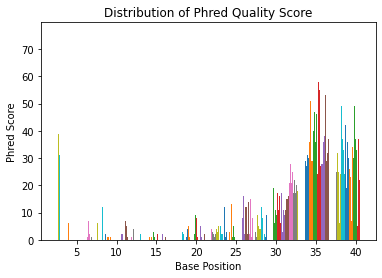

In [40]:
import matplotlib.pyplot as plt 
plt.hist(quals, bins=10)
plt.title("Distribution of Phred Quality Score")
plt.xlabel("Base Position")
plt.ylabel("Phred Score")
plt.show()

In [41]:
sequences = [record.seq for record in SeqIO.parse("SRR835775_1.first1000.fastq", "fastq")]

In [42]:
sequences[:100]

[Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAC', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...AGG', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...TTA', SingleLetterAlphabet()),
 Seq('CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCC...ACC', SingleLetterAlphabet()),
 Seq('AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCC...CAC', SingleLetterAlphabet()),
 Seq('TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGG...ACG', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...AAA', SingleLetterAlphabet()),
 Seq('AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT...TGG', SingleLetterAlphabet()),
 Seq('TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGG...GGG', SingleLetterAlphabet()),
 Seq('TAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCT